In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv("C:\\Users\\Sharon\\Zindi\\Insurance Prediction\\train_data.csv") 

In [3]:
test = pd.read_csv("C:\\Users\\Sharon\\Zindi\\Insurance Prediction\\test_data.csv") 

In [4]:
train.sample(50)

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
7098,H16661,2013,1.000000,0,V,V,V,U,NaN,2,1960.0,.,NaN,0
3777,H3332,2016,0.997268,0,V,N,O,R,480.0,2,1960.0,4,62826,0
6875,H15555,2016,0.997268,1,V,N,O,R,620.0,3,1950.0,3,94071,0
2625,H17173,2013,1.000000,0,V,N,O,R,1450.0,1,2010.0,4,35093,0
2396,H5315,2013,0.109589,1,V,V,V,U,2250.0,1,1980.0,.,33249,0
3207,H4158,2013,1.000000,0,V,V,V,U,300.0,1,1960.0,.,44109,0
299,H4125,2014,1.000000,0,V,N,O,R,8400.0,4,1980.0,8,6083,1
3244,H19620,2015,1.000000,0,V,N,O,R,460.0,1,1900.0,3,45234,0
5284,H7121,2014,1.000000,1,V,V,V,U,4500.0,4,1960.0,.,75120,1
4776,H14465,2012,1.000000,0,N,V,V,U,500.0,1,1980.0,.,74173,0


In [5]:
submission = pd.read_csv("C:\\Users\\Sharon\\Zindi\\Insurance Prediction\\sample_submission.csv")
submission.sample()

,Customer Id,Claim
212,H10331,1


In [6]:
Description = pd.read_csv("C:\\Users\\Sharon\\Zindi\\Insurance Prediction\\VariableDescription.csv")
print(Description)

              Variable                                        Description
0          Customer Id        Identification number for the Policy holder
1    YearOfObservation         year of observation for the insured policy
2       Insured_Period  duration of insurance policy in Olusola Insura...
3          Residential      is the building a residential building or not
4     Building_Painted  is the building painted or not (N-Painted, V-N...
5      Building_Fenced  is the building fence or not (N-Fenced, V-Not ...
6               Garden  building has garden or not (V-has garden; O-no...
7           Settlement  Area where the building is located. (R- rural ...
8   Building Dimension                 Size of the insured building in m2
9        Building_Type             The type of building (Type 1, 2, 3, 4)
10   Date_of_Occupancy                   date building was first occupied
11     NumberOfWindows                  number of windows in the building
12            Geo Code          Geogra

In [7]:
print(train.shape)
print(test.shape)

(7160, 14)
(3069, 13)


In [8]:
train.describe()

,YearOfObservation,Insured_Period,Residential,Building Dimension,Building_Type,Date_of_Occupancy,Claim
count,7160.000000,7160.000000,7160.000000,7054.000000,7160.000000,6652.000000,7160.000000
mean,2013.669553,0.909758,0.305447,1883.727530,2.186034,1964.456404,0.228212
std,1.383769,0.239756,0.460629,2278.157745,0.940632,36.002014,0.419709
min,2012.000000,0.000000,0.000000,1.000000,1.000000,1545.000000,0.000000
25%,2012.000000,0.997268,0.000000,528.000000,2.000000,1960.000000,0.000000
50%,2013.000000,1.000000,0.000000,1083.000000,2.000000,1970.000000,0.000000
75%,2015.000000,1.000000,1.000000,2289.750000,3.000000,1980.000000,0.000000
max,2016.000000,1.000000,1.000000,20940.000000,4.000000,2016.000000,1.000000


In [9]:
train.isnull().sum()/len(train)*100

Customer Id           0.000000
YearOfObservation     0.000000
Insured_Period        0.000000
Residential           0.000000
Building_Painted      0.000000
Building_Fenced       0.000000
Garden                0.097765
Settlement            0.000000
Building Dimension    1.480447
Building_Type         0.000000
Date_of_Occupancy     7.094972
NumberOfWindows       0.000000
Geo_Code              1.424581
Claim                 0.000000
dtype: float64

In [10]:
test.isnull().sum()/len(test)*100

Customer Id            0.000000
YearOfObservation      0.000000
Insured_Period         0.000000
Residential            0.000000
Building_Painted       0.000000
Building_Fenced        0.000000
Garden                 0.130336
Settlement             0.000000
Building Dimension     0.423591
Building_Type          0.000000
Date_of_Occupancy     23.721082
NumberOfWindows        0.000000
Geo_Code               0.423591
dtype: float64

I'd choose to check the unique values in these missing features so as to know how to fill them. This will help reduce biases ignorantly.

In [11]:
print(train['Garden'].unique())
print(train['Building Dimension'].unique())
print(train['Date_of_Occupancy'].unique())
print(train['Geo_Code'].unique())

['V' 'O' nan]
[ 290.  490.  595. ... 4207. 1775. 1017.]
[1960. 1850. 1800. 1980. 1988. 2013. 2011. 1550. 1900. 2007. 1970. 1950.
 1700. 1976. 1940. 1920. 1982.   nan 1972. 2010. 1971. 1995. 2006. 1999.
 1969. 1985. 1965. 1981. 1975. 1997. 2003. 1990. 1930. 1973. 1991. 1974.
 1978. 1967. 1927. 1952. 1957. 2009. 1977. 1890. 1949. 1951. 2008. 1987.
 2000. 1962. 1956. 1993. 1912. 1983. 1954. 1968. 2004. 1936. 1958. 1966.
 1953. 1979. 1946. 1955. 2001. 1870. 1961. 2015. 1613. 1964. 1984. 2014.
 2002. 1986. 1992. 2005. 2012. 1910. 1945. 1864. 1942. 1939. 1934. 1998.
 1908. 1948. 1860. 1926. 1938. 1895. 1545. 1959. 1989. 1996. 1963. 1840.
 2016. 1718. 1600. 1875. 1898. 1880. 1915. 1994. 1810. 1937. 1907. 1931.
 1925. 1935. 1824. 1914. 1750. 1846. 1903. 1905. 1906. 1830. 1923. 1924.
 1928. 1947. 1911. 1901. 1902. 1904. 1919. 1896. 1913. 1893. 1820. 1884.
 1871. 1780. 1929.]
['1053' '1143' '1160' ... '2B096' '2B353' nan]


In [12]:
print(test['Garden'].unique())
print(test['Building Dimension'].unique())
print(test['Date_of_Occupancy'].unique())
print(test['Geo_Code'].unique())

['O' 'V' nan]
[3.0000e+02 7.9000e+02 1.4050e+03 3.2250e+03 3.1000e+01 1.4000e+03
 1.3000e+03 1.2000e+03 4.5000e+02 4.1000e+02 3.1800e+02 3.6000e+02
 1.7420e+03 2.2430e+03 1.7910e+03 6.0200e+02 4.9740e+03 1.5000e+03
 4.8000e+02 3.1600e+03 7.5000e+02 1.0027e+04 2.4000e+03 6.3000e+03
 5.7960e+03 8.7000e+03 3.2000e+03 3.6400e+03 4.0000e+03 1.9000e+02
 1.5300e+03 4.6340e+03 2.5500e+03 3.3000e+03 5.5000e+03 1.6700e+03
 1.8700e+03 1.6250e+03 1.7300e+03 6.0000e+02 5.5000e+02 2.3250e+03
 3.9000e+03 2.5300e+03 7.3070e+03 1.1660e+03 5.0000e+02 2.4300e+03
 3.0800e+03 2.2000e+03 1.6520e+04 7.2500e+02 9.0000e+02 3.4140e+03
 3.7000e+02 3.5000e+02 8.0000e+02 6.5200e+02 9.7000e+02 1.1000e+03
 4.1300e+02 8.0000e+03 1.3350e+04 6.8930e+03 2.0000e+02 1.5000e+02
 4.0000e+02 3.7500e+03 2.4000e+02 1.6600e+03 2.5000e+02 1.0500e+04
 4.8000e+03 2.9300e+02 1.9000e+03 3.4000e+02 8.7000e+02 4.3930e+03
 6.0700e+03 2.2450e+03 1.8250e+03 3.4600e+03 1.0000e+03 1.7000e+03
 1.6500e+03 4.2000e+02 2.3940e+03 1.3400e+03 2.4

The following observations were made from the two previous cells contains the train and test unique values for columns with missing values:

- The datasets contained in the train data does not looks as much as the test. 
- It is also observed that the Geo_Code feature had some of its values blended with the "A" and "B" alphabets. We will have to work on the Geo_Code column to make it useable
- Also, it will be a better idea to merge these train and test sets so as to get them balanced while replacing the null values.

In [13]:
data = [train['Garden'], test['Garden']]
for dataset in data:
    print(dataset.mode())
    train['Garden'] = train['Garden'].fillna('V')
    test['Garden'] = test['Garden'].fillna('O')

0    O
dtype: object
0    V
dtype: object


In [14]:
data = [train, test]
for dataset in data:
    
    dataset['Building Dimension'] = dataset['Building Dimension'].fillna(1883.727)
    dataset['Date_of_Occupancy'] = dataset['Date_of_Occupancy'].fillna(1970.0)
    dataset['Geo_Code'] = dataset['Geo_Code'].replace('2B096', '21096')
    dataset['Geo_Code'] = dataset['Geo_Code'].replace('2B353', '21353')
    dataset['Geo_Code'] = dataset['Geo_Code'].replace('2A004', '20004')
    dataset['Geo_Code'] = dataset['Geo_Code'].replace('2A247', '20247')
    dataset['Geo_Code'] = dataset['Geo_Code'].replace('2A903', '20903')
    dataset['Geo_Code'] = dataset['Geo_Code'].replace('2B007', '21007')
    dataset['Geo_Code'] = dataset['Geo_Code'].replace('2B033', '21033')
    dataset['Geo_Code'] = dataset['Geo_Code'].replace('2B037', '21037')
    dataset['Geo_Code'] = dataset['Geo_Code'].replace('2B042', '21042')
    dataset['Geo_Code'] = dataset['Geo_Code'].replace('2B050', '21050')
    dataset['Geo_Code'] = dataset['Geo_Code'].replace('2B298', '21298')
    dataset['Geo_Code'] = dataset['Geo_Code'].replace('2B309', '21309')
    dataset['Geo_Code'] = dataset['Geo_Code'].replace('2A090', '20090')
    dataset['Geo_Code'] = dataset['Geo_Code'].replace('2A130', '20130')
    dataset['Geo_Code'] = dataset['Geo_Code'].fillna('6083')

In [15]:
train.isnull().sum()/len(train)*100

Customer Id           0.0
YearOfObservation     0.0
Insured_Period        0.0
Residential           0.0
Building_Painted      0.0
Building_Fenced       0.0
Garden                0.0
Settlement            0.0
Building Dimension    0.0
Building_Type         0.0
Date_of_Occupancy     0.0
NumberOfWindows       0.0
Geo_Code              0.0
Claim                 0.0
dtype: float64

In [16]:
test.isnull().sum()/len(test)*100

Customer Id           0.0
YearOfObservation     0.0
Insured_Period        0.0
Residential           0.0
Building_Painted      0.0
Building_Fenced       0.0
Garden                0.0
Settlement            0.0
Building Dimension    0.0
Building_Type         0.0
Date_of_Occupancy     0.0
NumberOfWindows       0.0
Geo_Code              0.0
dtype: float64

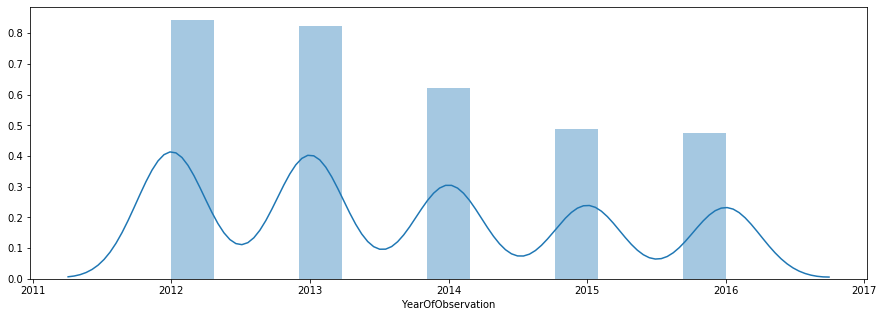

In [17]:
plt.figure(figsize = (15, 5))
sns.distplot(train['YearOfObservation'])

In [18]:
# Rename the Year of Observation

data = [train, test]
for dataset in data:
    dataset['YearOfObservation'] = dataset['YearOfObservation'].replace(2012, 1)
    dataset['YearOfObservation'] = dataset['YearOfObservation'].replace(2013, 2)
    dataset['YearOfObservation'] = dataset['YearOfObservation'].replace(2014, 3)
    dataset['YearOfObservation'] = dataset['YearOfObservation'].replace(2015, 4)
    dataset['YearOfObservation'] = dataset['YearOfObservation'].replace(2016, 5)
   

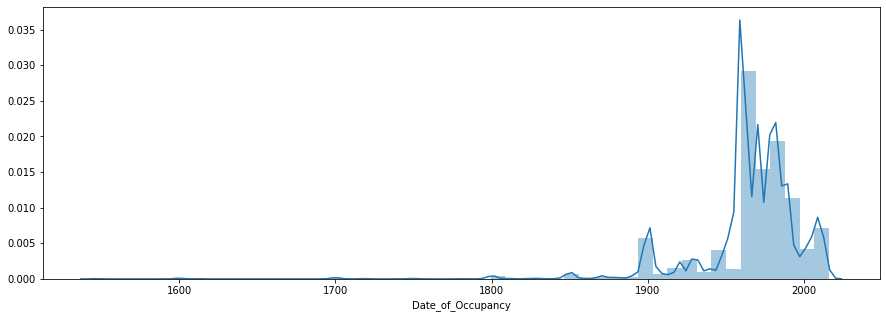

In [19]:
plt.figure(figsize = (15, 5))
sns.distplot(train['Date_of_Occupancy'])

In [20]:
# Group the Date of Occupancy

data = [train, test]
for dataset in data:
    dataset.loc[dataset['Date_of_Occupancy'] <= 1850.0, 'Date_of_Occupancy'] = 1.0
    dataset.loc[(dataset['Date_of_Occupancy'] > 1850.0) & (dataset['Date_of_Occupancy'] <= 1910.0), 'Date_of_Occupancy'] = 2.0
    dataset.loc[(dataset['Date_of_Occupancy'] > 1910.0) & (dataset['Date_of_Occupancy'] <= 1959.0), 'Date_of_Occupancy'] = 3.0
    dataset.loc[dataset['Date_of_Occupancy'] == 1960.0, 'Date_of_Occupancy']  = 4.0
    dataset.loc[(dataset['Date_of_Occupancy'] > 1960.0) & (dataset['Date_of_Occupancy'] <= 1980.0), 'Date_of_Occupancy'] = 5.0
    dataset.loc[(dataset['Date_of_Occupancy'] > 1980.0) & (dataset['Date_of_Occupancy'] <= 2000.0), 'Date_of_Occupancy'] = 6.0
    dataset.loc[dataset['Date_of_Occupancy'] > 2000.0, 'Date_of_Occupancy'] = 7.0
    dataset['Date_of_Occupancy'] = dataset['Date_of_Occupancy'].astype(float)

In [21]:
print(train['Date_of_Occupancy'].unique())
print(test['Date_of_Occupancy'].unique())

[4. 1. 5. 6. 7. 2. 3.]
[4. 7. 6. 5. 1. 2. 3.]


In [22]:
data = [train, test]
for dataset in data:
    print(dataset.columns)
 

Index(['Customer Id', 'YearOfObservation', 'Insured_Period', 'Residential',
       'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
       'Building Dimension', 'Building_Type', 'Date_of_Occupancy',
       'NumberOfWindows', 'Geo_Code', 'Claim'],
      dtype='object')
Index(['Customer Id', 'YearOfObservation', 'Insured_Period', 'Residential',
       'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
       'Building Dimension', 'Building_Type', 'Date_of_Occupancy',
       'NumberOfWindows', 'Geo_Code'],
      dtype='object')


In [23]:
train['Geo_Code'] = train['Geo_Code'].astype(int)
test['Geo_Code'] = test['Geo_Code'].astype(int)

train['Building Dimension'] = train['Building Dimension'].astype(float)
test['Building Dimension'] = test['Building Dimension'].astype(float)

In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 14 columns):
Customer Id           7160 non-null object
YearOfObservation     7160 non-null int64
Insured_Period        7160 non-null float64
Residential           7160 non-null int64
Building_Painted      7160 non-null object
Building_Fenced       7160 non-null object
Garden                7160 non-null object
Settlement            7160 non-null object
Building Dimension    7160 non-null float64
Building_Type         7160 non-null int64
Date_of_Occupancy     7160 non-null float64
NumberOfWindows       7160 non-null object
Geo_Code              7160 non-null int32
Claim                 7160 non-null int64
dtypes: float64(3), int32(1), int64(4), object(6)
memory usage: 755.2+ KB


Let's bin the "Geo_Code" column to keep it in similar range as other columns. While we standardize the Building Dimension by changing it's unit from square meters to square kilometers

In [25]:
data = [train, test]
for dataset in data:
    
    bins = np.linspace(min(dataset["Geo_Code"]), max(dataset["Geo_Code"]), 7)
    group_names = [1, 2, 3, 4, 5, 6]
    dataset['Geo_Code'] = pd.cut(dataset['Geo_Code'], bins, labels = group_names, include_lowest=True )
    print(dataset['Geo_Code'].value_counts())
    dataset['Geo_Code'] = dataset['Geo_Code'].astype(int)

1    1754
5    1621
6    1422
3    1035
4     681
2     647
Name: Geo_Code, dtype: int64
1    1002
5     508
6     482
4     415
2     381
3     281
Name: Geo_Code, dtype: int64


In [26]:
data = [train, test]
for dataset in data:
    
    dataset['Building Dimension'] = dataset['Building Dimension'] / 1e+6 

It is observed that the column ['NumberOfWindows'] has 3551 number of its rows filled with '-'. Therefore it will be dropped.

In [27]:
data = [train, test]
for dataset in data:
    
    dataset = dataset.drop(['Customer Id' , 'NumberOfWindows'], axis = 1, inplace = True)

In [28]:
train_ = pd.get_dummies(train[['Building_Painted', 'Building_Fenced', 'Garden', 'Settlement']])


In [29]:
test_ = pd.get_dummies(test[['Building_Painted', 'Building_Fenced', 'Garden', 'Settlement']])


In [30]:
train_data = pd.concat([train, train_], axis = 1)
train_data = train_data.drop(['Building_Painted', 'Building_Fenced', 'Garden', 'Settlement'], axis = 1)

In [31]:
test_data = pd.concat([test, test_], axis = 1)
test_data = test_data.drop(['Building_Painted', 'Building_Fenced', 'Garden', 'Settlement'], axis = 1)

In [32]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 16 columns):
YearOfObservation     7160 non-null int64
Insured_Period        7160 non-null float64
Residential           7160 non-null int64
Building Dimension    7160 non-null float64
Building_Type         7160 non-null int64
Date_of_Occupancy     7160 non-null float64
Geo_Code              7160 non-null int32
Claim                 7160 non-null int64
Building_Painted_N    7160 non-null uint8
Building_Painted_V    7160 non-null uint8
Building_Fenced_N     7160 non-null uint8
Building_Fenced_V     7160 non-null uint8
Garden_O              7160 non-null uint8
Garden_V              7160 non-null uint8
Settlement_R          7160 non-null uint8
Settlement_U          7160 non-null uint8
dtypes: float64(3), int32(1), int64(4), uint8(8)
memory usage: 475.5 KB


In [33]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3069 entries, 0 to 3068
Data columns (total 15 columns):
YearOfObservation     3069 non-null int64
Insured_Period        3069 non-null float64
Residential           3069 non-null int64
Building Dimension    3069 non-null float64
Building_Type         3069 non-null int64
Date_of_Occupancy     3069 non-null float64
Geo_Code              3069 non-null int32
Building_Painted_N    3069 non-null uint8
Building_Painted_V    3069 non-null uint8
Building_Fenced_N     3069 non-null uint8
Building_Fenced_V     3069 non-null uint8
Garden_O              3069 non-null uint8
Garden_V              3069 non-null uint8
Settlement_R          3069 non-null uint8
Settlement_U          3069 non-null uint8
dtypes: float64(3), int32(1), int64(3), uint8(8)
memory usage: 179.9 KB


In [34]:
train_data.sample(10)

,YearOfObservation,Insured_Period,Residential,Building Dimension,Building_Type,Date_of_Occupancy,Geo_Code,Claim,Building_Painted_N,Building_Painted_V,Building_Fenced_N,Building_Fenced_V,Garden_O,Garden_V,Settlement_R,Settlement_U
1602,3,1.000000,0,0.001330,2,6.0,1,0,0,1,1,0,1,0,1,0
3245,4,0.983562,1,0.004490,1,7.0,3,1,0,1,1,0,1,0,1,0
1366,4,1.000000,0,0.001050,2,4.0,1,1,1,0,0,1,0,1,0,1
7121,1,1.000000,1,0.001884,2,6.0,1,0,0,1,0,1,0,1,0,1
1398,3,1.000000,1,0.001700,2,4.0,1,0,1,0,0,1,0,1,0,1
5746,1,1.000000,0,0.002085,2,5.0,6,0,1,0,0,1,0,1,0,1
5381,3,1.000000,1,0.001120,2,3.0,5,0,0,1,1,0,1,0,1,0
375,2,1.000000,1,0.002110,4,7.0,1,0,0,1,1,0,1,0,1,0
6415,2,1.000000,1,0.000387,3,4.0,6,1,1,0,0,1,0,1,0,1
1065,4,1.000000,0,0.000700,2,4.0,1,1,0,1,0,1,0,1,0,1


>### Building the model

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [37]:
knn = KNeighborsClassifier(n_neighbors = 3)

In [36]:
X = train_data.drop('Claim', axis = 1)
y = train_data['Claim']


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 14)

In [39]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [42]:
y_pred = knn.predict(X_test)

In [43]:
print('Test Accuracy \n', knn.score(X_test, y_test))

Test Accuracy 
 0.729050279329609


In [102]:
from sklearn.linear_model import LogisticRegression 
logr = LogisticRegression(C = 100, random_state = 21)
logr.fit(X_train, y_train)

C:\Users\Sharon\Anaconda3\PYTHON\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=21, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [103]:
y_pred = logr.predict(X_test)

In [104]:
print ('Training score', logr.score(X_train, y_train))
print ('Testing score', logr.score(X_test, y_test))


Training score 0.7751396648044693
Testing score 0.7758379888268156


In [120]:
import xgboost
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators = 20, oob_score = True, random_state = 50)
xgb.fit(X_train, y_train)
print(xgb.score(X_train, y_train))

0.8194832402234636


In [121]:
xgb.predict(X_test)
print(xgb.score(X_test, y_test))

0.7925977653631285


In [129]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
pred = cross_val_predict(xgb, X_train, y_train, cv = 5)
confusion_matrix(y_train, pred)

array([[4181,  238],
       [1030,  279]], dtype=int64)

In [109]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth = 7, random_state = 17)

In [94]:
tree.fit(X_train, y_train)
tree.predict(X_test)

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [95]:
print ('Training score', tree.score(X_train, y_train))
print ('Testing score', tree.score(X_test, y_test))


Training score 0.8056913407821229
Testing score 0.7814245810055865


In [79]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
pred = cross_val_predict(tree, X_train, y_train, cv = 5)
confusion_matrix(y_train, pred)

array([[4236,  183],
       [1063,  246]], dtype=int64)

In [127]:
from sklearn.ensemble import RandomForestClassifier 
classifier = RandomForestClassifier(n_estimators = 30, random_state = 22)
classifier.fit(X_train, y_train)
classifier.predict(X_test)

print ('Training score', classifier.score(X_train, y_train))
print ('Testing score', classifier.score(X_test, y_test))

Training score 0.9916201117318436
Testing score 0.7590782122905028


In [128]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
pred = cross_val_predict(classifier, X_train, y_train, cv = 5)
confusion_matrix(y_train, pred)

array([[4025,  394],
       [1005,  304]], dtype=int64)